In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files

uploaded = files.upload()


Saving market.csv to market.csv


In [15]:



data = pd.read_csv('market.csv')

print(data.shape)


(1000, 17)


In [20]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


DATA CLEANING

In [21]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [23]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [24]:
print("Dataset contains {} row and {} colums".format(data.shape[0],data.shape[1]))

Dataset contains 1000 row and 17 colums


<ipython-input-30-2f84c9eed067>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=data, palette='copper')


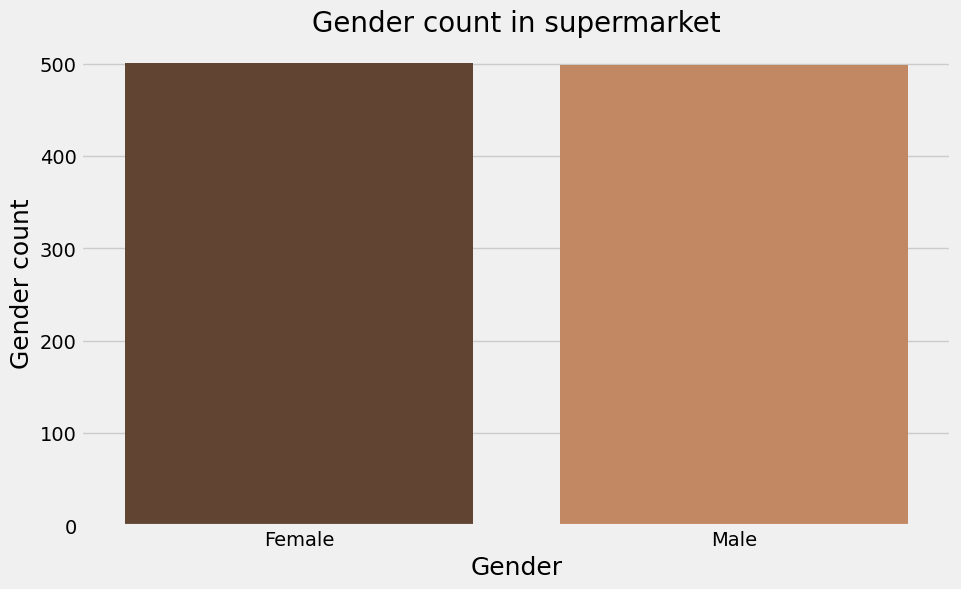

In [30]:
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Gender', data=data, palette='copper')
ax.set_xlabel(xlabel="Gender", fontsize=18)
ax.set_ylabel(ylabel="Gender count", fontsize=18)
ax.set_title(label="Gender count in supermarket", fontsize=20)
plt.show()


In [31]:
data.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


**TIPO DE CLIENTE**

<ipython-input-33-131574e30358>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Customer type", data=data, palette="rocket_r")


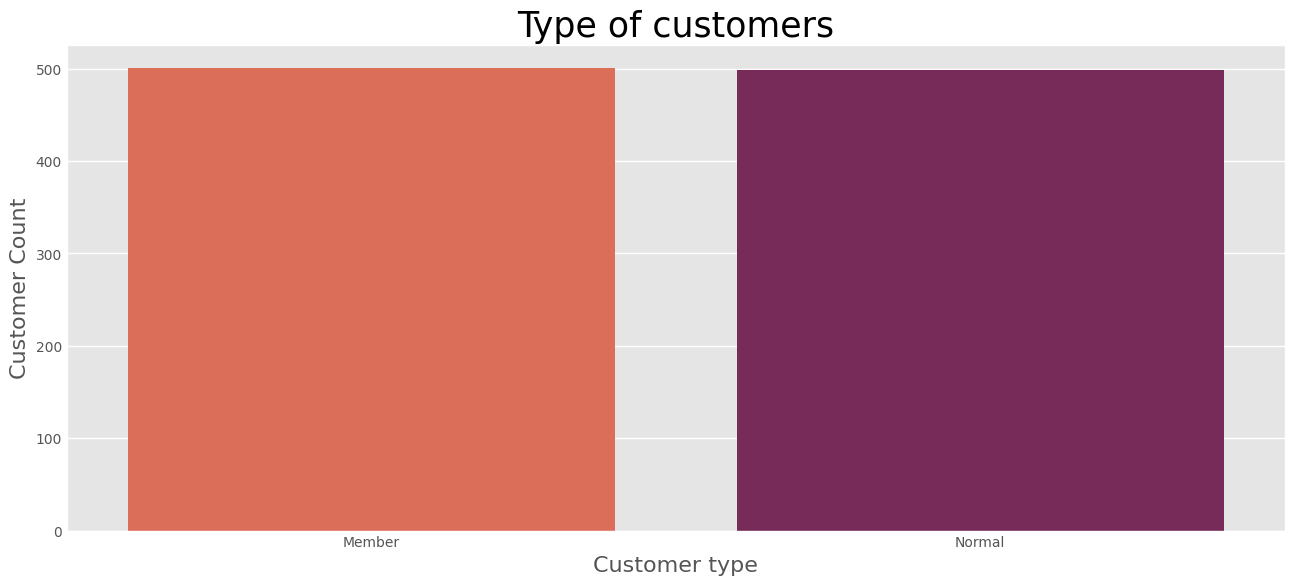

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="Customer type", data=data, palette="rocket_r")
ax.set_title("Type of customers", fontsize=25)
ax.set_xlabel("Customer type", fontsize=16)
ax.set_ylabel("Customer Count", fontsize=16)
plt.show()


In [34]:
data.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


**Acima podemos ver o tipo de cliente em todas as agências combinadas agora vamos verificar as diferentes agências.**

Text(0, 0.5, 'Customer Count')

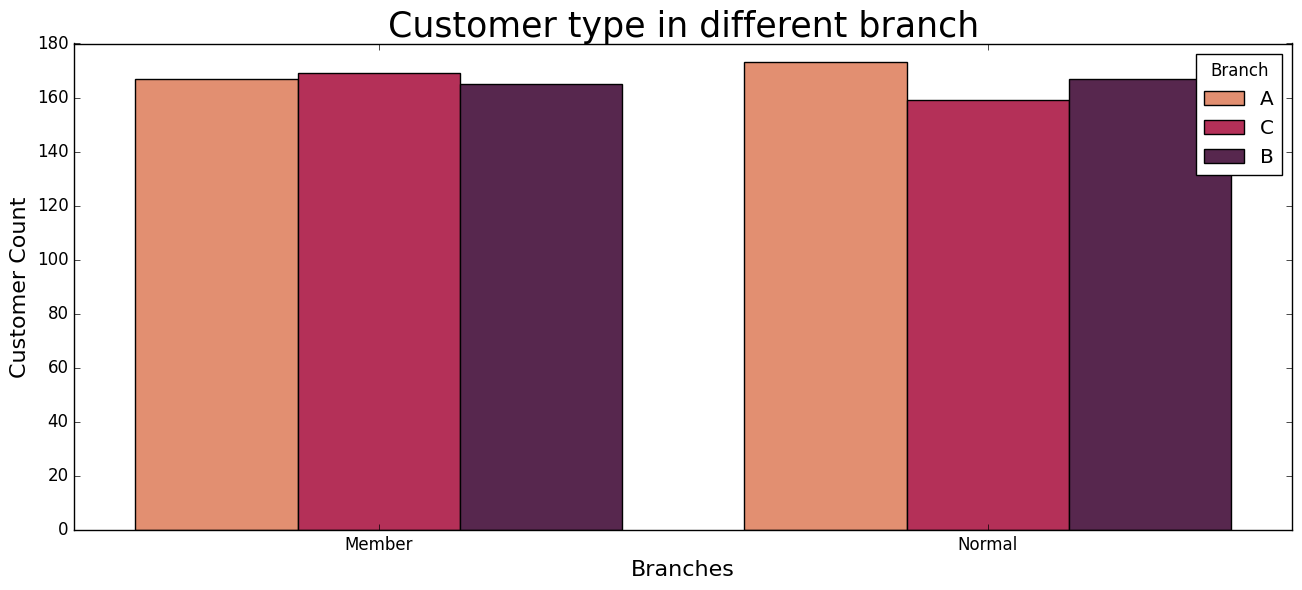

In [35]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.countplot(x = "Customer type", hue = "Branch", data = data, palette= "rocket_r")
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

**Verificar os diferentes métodos de pagamento utilizados.**

<ipython-input-36-4c522f9214b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "Payment", data = data, palette = "tab20")


Text(0, 0.5, ' Customer Count')

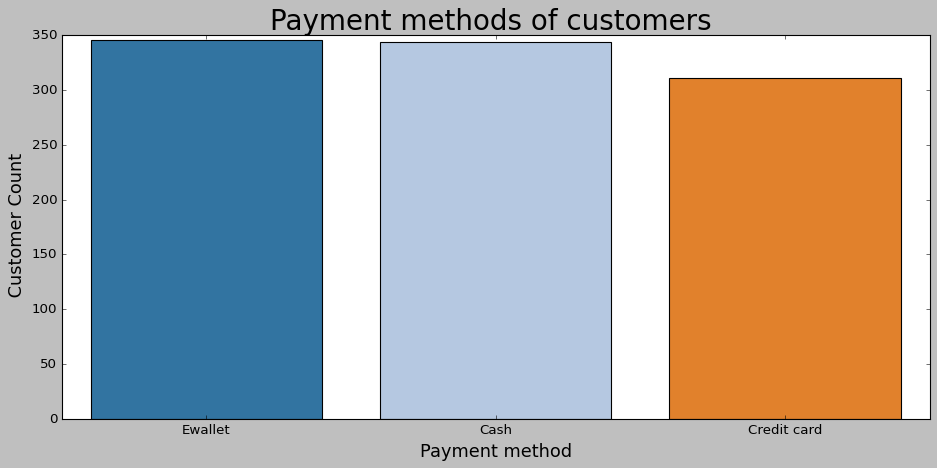

In [36]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x = "Payment", data = data, palette = "tab20")
ax.set_title(label = "Payment methods of customers ", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 16)

**Distribuição da forma de pagamento em todas as agências**

Text(0, 0.5, 'Peple Count')

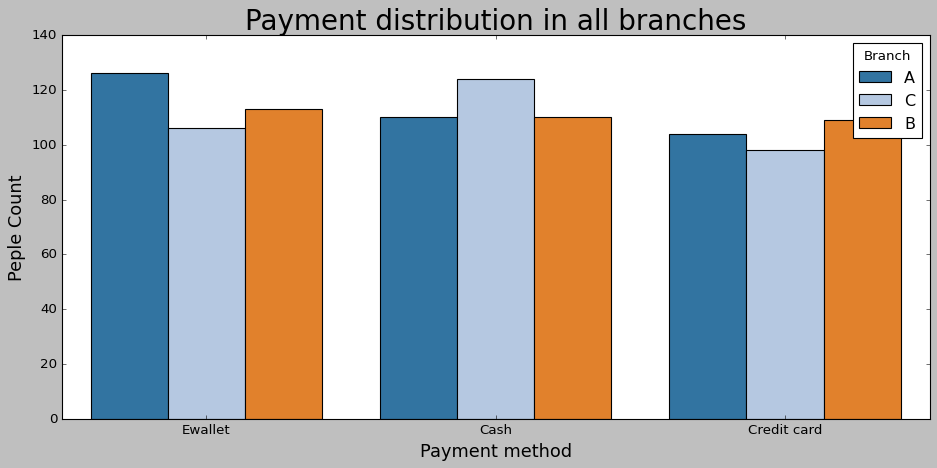

In [37]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = data, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

**Distribuição da classificação em 3 ramos**

<ipython-input-38-9de5e7daaf1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Branch", y = "Rating" ,data =data, palette= "RdYlBu")


Text(0, 0.5, 'Rating distribution')

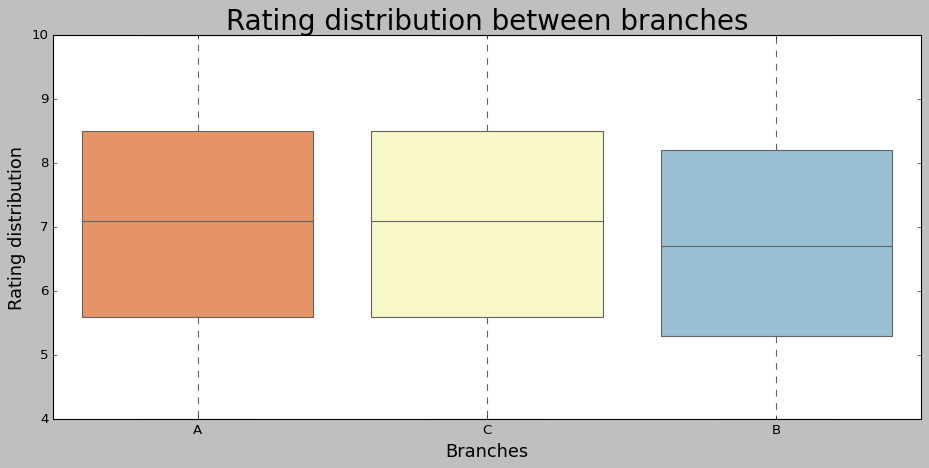

In [38]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(x="Branch", y = "Rating" ,data =data, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

**A classificação média das agências A e C é superior a sete e da agência B é inferior a 7.**

**Tempo máximo de vendas**

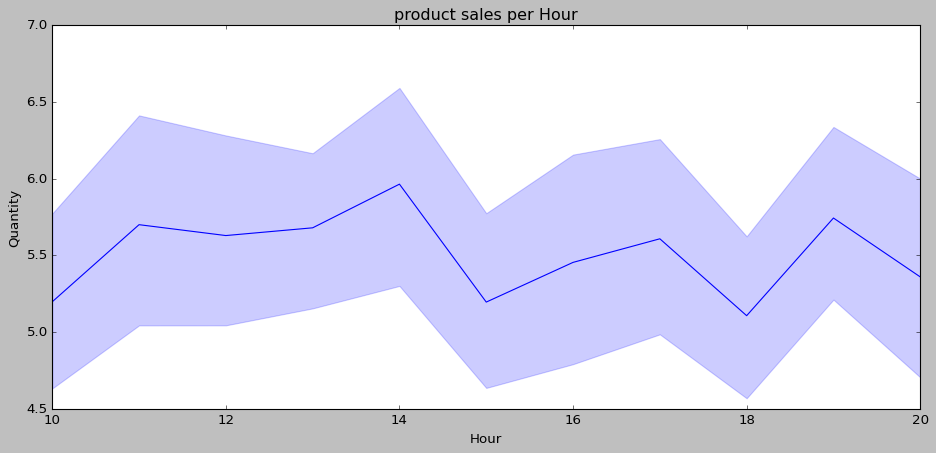

In [39]:
data["Time"]= pd.to_datetime(data["Time"])
data["Hour"]= (data["Time"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = data).set_title("product sales per Hour")

OBS: o supermercado realiza a maior parte de suas vendas às 14h, horário local.

**Classificação vs vendas**

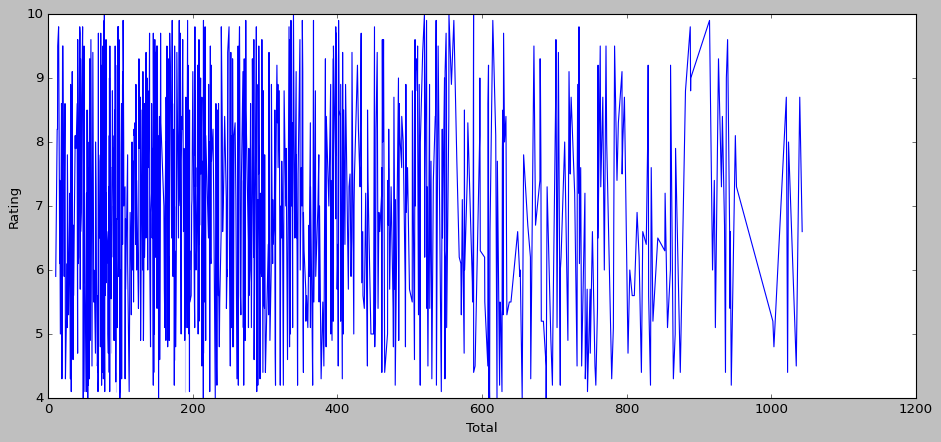

In [40]:
plt.figure(figsize=(14,6))
plt.style.use('classic')
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=data)

**Usando gráfico boxen**

Text(0, 0.5, 'Product Line')

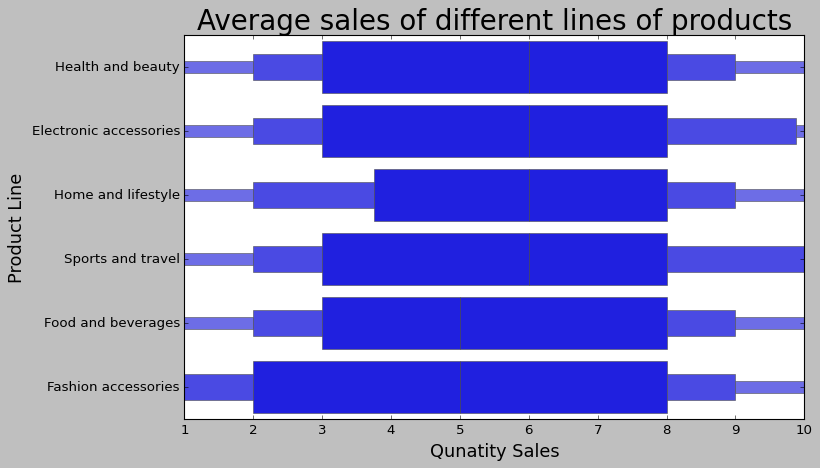

In [41]:
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = data,)
ax.set_title(label = "Average sales of different lines of products", fontsize = 25)
ax.set_xlabel(xlabel = "Qunatity Sales",fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

Aqui podemos ver a média de vendas das diferentes linhas de produtos. Saúde e beleza com as vendas mais altas, enquanto os acessórios FashIon com as vendas mais baixas.

**contagem de vendas desses produtos**

Text(0, 0.5, 'Product Line')

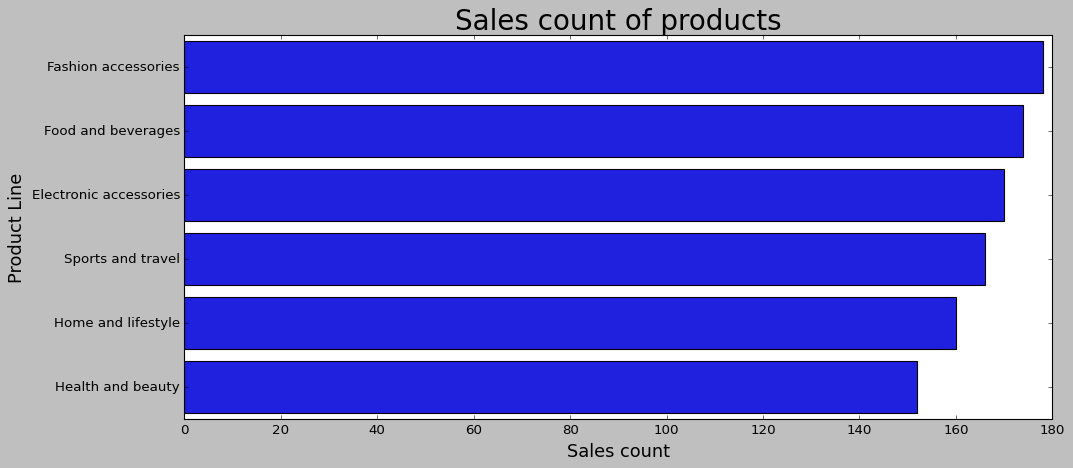

In [42]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product line', data=data, order = data['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

 os produtos mais vendidos na figura acima.

Vendas totais de produtos usando boxenplot
**negrito**

Text(0, 0.5, 'Product line')

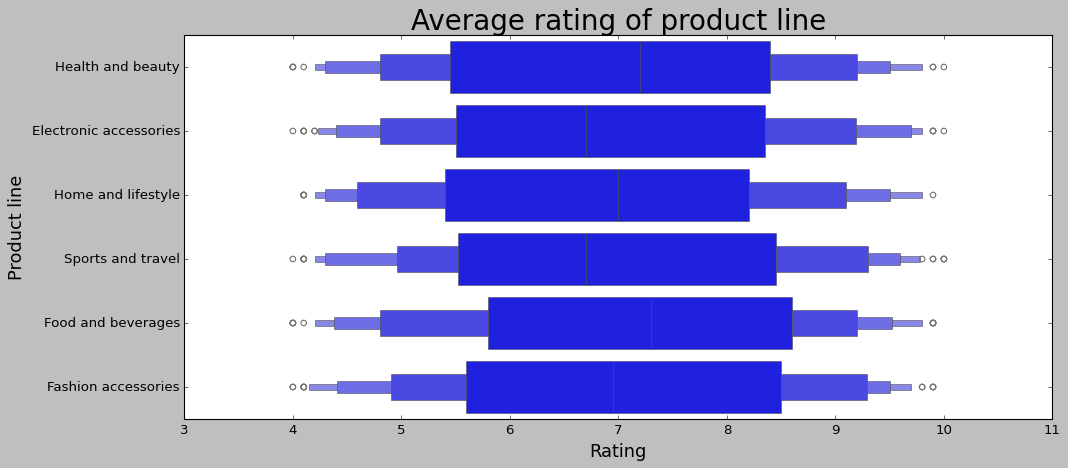

In [43]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.boxenplot(y = "Product line", x = "Rating", data = data)
ax.set_title("Average rating of product line", fontsize = 25)
ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)

**Vendas de produtos com base no gênero**

Text(0, 0.5, 'Product Line')

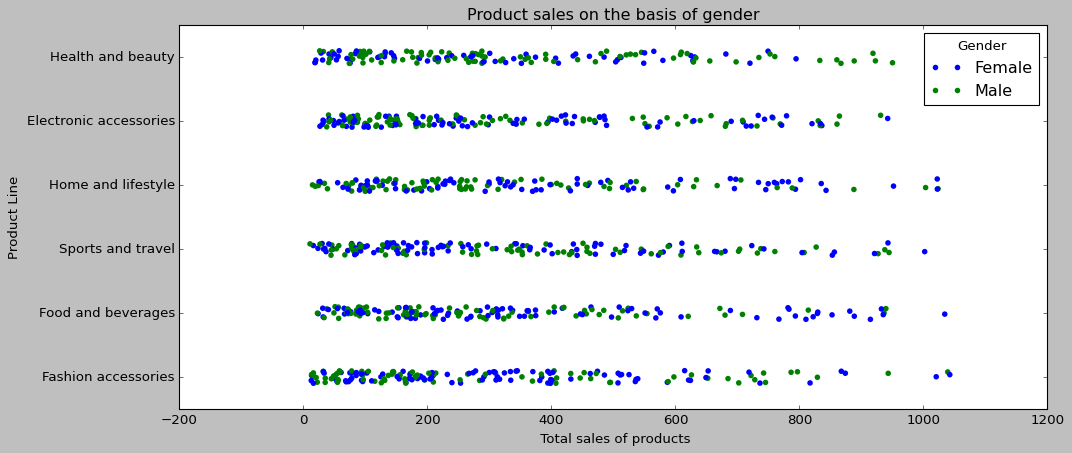

In [44]:
plt.style.use('classic')
plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = data)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

**Produto e receita bruta**

<Figure size 1120x480 with 0 Axes>

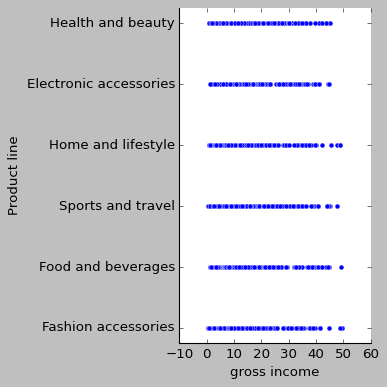

In [45]:
plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.relplot(y= "Product line", x = "gross income", data = data)
# ax.set_title(label = "Products and Gross income")
# ax.set_xlabel(xlabel = "Total gross income")
# ax.set_ylabel(ylabel = "Product line")

**Aprendizados Obtidos:**

* Entendimento da distribuição de gênero no supermercado.
* Análise dos métodos de pagamento preferidos pelos clientes.
* Avaliação da relação entre avaliações e vendas.
* Identificação das categorias de produtos mais e menos vendidas.
* Observação das preferências de gênero em relação aos produtos.
* Exploração da relação entre avaliações e receita bruta por linha de produto.